In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [114]:
N = 20
x = np.random.randn(N)
x[int(N  * 0.3):] += 5

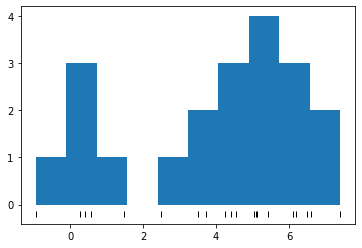

In [115]:
plt.hist(x);
plt.plot(x, np.full_like(x, -0.2), '|k')

In [20]:
np.full_like(x, 1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

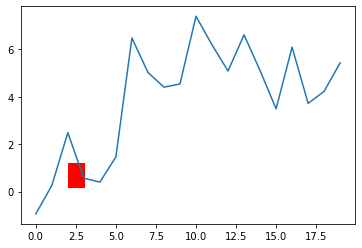

In [116]:
ax = plt.axes()
ax.plot(x)
ax.add_patch(plt.Rectangle((2,0.2), 1,1, color= 'r'))

### Now, KDE
See how it is evolving

In [117]:
x_points = np.linspace(x.min(), x.max() + 1, 2000)

In [118]:
density = sum((abs(xi - x_points) < 0.5) for xi in x)
density

array([1, 1, 1, ..., 0, 0, 0])

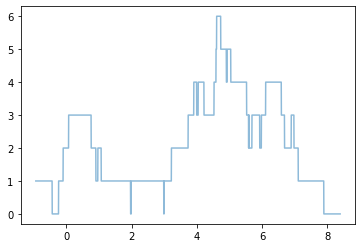

In [119]:
plt.plot(x_points, density, alpha= 0.5)

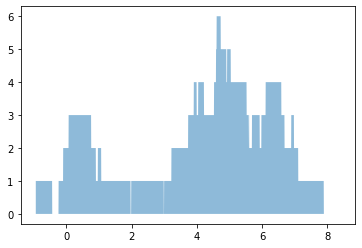

In [120]:
plt.fill_between(x_points, density, alpha= 0.5)

### That's pretty much it.

## Now, KDE

In [97]:
from scipy.stats import norm

In [125]:
x_points = np.linspace(x.min(), x.max(), 1000)
density = sum(norm(xi).pdf(x_points) for xi in x)

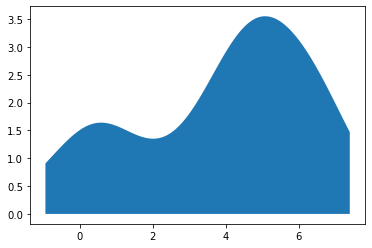

In [126]:
plt.fill_between(x_points, density)

# 

#  From Sklearn

In [153]:
from sklearn.neighbors import KernelDensity

In [164]:
kde = KernelDensity()

In [165]:
kde.fit(x[:, None])

KernelDensity()

In [166]:
prob = kde.score_samples(x_points[:, None])

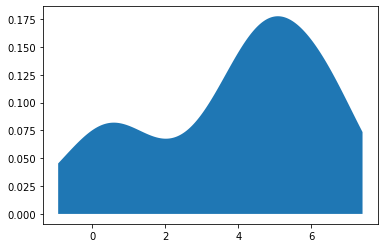

In [167]:
plt.fill_between(x_points, np.exp(prob))